# Week 4 Lecture 2:  Iterative Methods

In [ ]:
import numpy as np
import scipy.linalg as la

# Rahman notes:
## Matrix iteration

Suppose we have the matrix equation $Ax = b$ where we write $A = I - M$.  As we showed in the theory lecture, we can write a recurrence relation for the solution: $x_{n+1} = Mx_n + b$.  Further assume that this recurrence relation covnerges -- we can test for convergence by verifying the maximal eigenvalue is within unity in absolute value.  Then as $n \rightarrow \infty$, $x_n \rightarrow x$.  Let's see how this works in an example.

In [ ]:
### Initialization block
n = 10
A = np.identity(n) - 0.3*(np.random.rand(n,n) - 0.5)
M = np.identity(n)-A
b = np.random.rand(n,1)
x = np.zeros((n,1))

w, V = np.linalg.eig(M)
print(np.max(np.abs(w)))

0.28222311786910625


In [ ]:
### Solution block
x = M@x + b
print('x = ', x, '   Error = ', A@x-b)

x =  [[ 1.080302  ]
 [ 0.46743161]
 [ 1.1878141 ]
 [ 0.48813548]
 [-0.23018791]
 [ 0.63394903]
 [ 0.98852123]
 [ 0.90072341]
 [ 1.09857257]
 [ 1.03717597]]    Error =  [[ 2.10399865e-04]
 [ 2.70746356e-04]
 [ 5.97098309e-06]
 [-1.00354006e-04]
 [-1.07784711e-03]
 [-2.00740207e-03]
 [ 1.44160235e-03]
 [ 8.02208220e-04]
 [ 3.53955221e-05]
 [-4.98039617e-04]]


We can just play the solution block to get to the next iterate.  To reset it play the initalization block again.

## Jacobi Method

A "good" algorithm should be robust and fast.  Jacobi's algorithm is based around the more robust additive decomposition of a matrix: $A = L + D + U$.  As we showed in the theory lecture, this gives us the recurrence relation: $x_{n+1} = -D^{-1}(L+U)x_n + D^{-1}b$.  Lets see how this works through the following example.

In [ ]:
### Initialization Block
d = np.array([1, 2, 3, 4, 5])
D = np.diag(d)
d = d.reshape(5,1)
A = D + 0.1*np.random.randn(5,5)
LpU = A - D # L+U
b = np.ones((5,1))
x = np.zeros((5,1))

M = -LpU/d
c = b/d

In [ ]:
### Solution block
x = M@x + c
print('x = ', x, '\n', '   Error = ', A@x-b)

x =  [[1.        ]
 [0.5       ]
 [0.33333333]
 [0.25      ]
 [0.2       ]] 
    Error =  [[-0.08883391]
 [-0.2159052 ]
 [ 0.01698502]
 [-0.17664335]
 [ 0.11493104]]


We can just play the solution block to get to the next iterate.  To reset it play the initalization block again.

Notice that I used elementwise division with a column vector containing the diagonal elements of the diagonal matrix.  This is because, as I showed before, the inverse of the diagonal matrix is just the reciprocal of the diagonal entries, which is precisely what the elementwise division with the column vector gives us.  I encourage you to write it out with pen and paper to convince yourselves that this is true.  This elementwise division is much faster than what is done in the Older Notes towards the bottom of this document.

## Gauss-Seidel Algorithm

Similarly for Gauss-Seidel we have the recurrence relation: $x_{n+1} = -(L+D)^{-1}Ux_n + (L+D)^{-1}b$

In [ ]:
### Initialization Block
D = np.diag(np.array([1, 2, 3, 4, 5]))
A = D + 0.1*np.random.randn(5,5)
LpD = np.tril(A) # L+D
U = A - LpD
b = np.ones((5,1))
x = np.zeros((5,1))

M = -la.solve(LpD, U)
c = la.solve(LpD, b)

In [ ]:
### Solution block
x = M@x + c
print('x = ', x, '\n', '   Error = ', A@x-b)

x =  [[1.07254361]
 [0.49127848]
 [0.26801721]
 [0.27954481]
 [0.21737354]] 
    Error =  [[-1.59465774e-11]
 [-1.36196499e-10]
 [-3.04186454e-10]
 [ 1.59641189e-11]
 [ 0.00000000e+00]]


## Comparing Jacobi and Gauss-Seidel



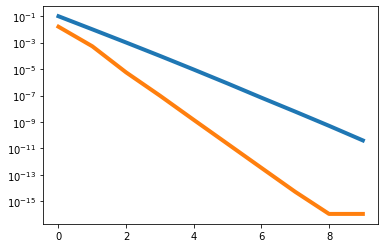

In [ ]:
import matplotlib.pyplot as plt

d = np.array([1, 2, 3, 4, 5])
D = np.diag(d)
d = d.reshape(5,1)
A = D + 0.1*np.random.randn(5,5)
LpU = A - D # L+U
LpD = np.tril(A) # L+D
U = A - LpD
b = np.ones((5,1))
x_j = np.zeros((5,1))
x_gs = x_j.copy()

M_j = -LpU/d
c_j = b/d
M_gs = -la.solve(LpD, U)
c_gs = la.solve(LpD, b)

TrueSol = la.solve(A, b)

T = 10
err_j = np.zeros(T)
err_gs = err_j.copy()

for i in range(T):
  x_j = M_j@x_j + c_j
  x_gs = M_gs@x_gs + c_gs
  err_j[i] = np.max(np.abs(x_j - TrueSol))
  err_gs[i] = np.max(np.abs(x_gs - TrueSol))

T = np.arange(T)
plt.semilogy(T, err_j, T, err_gs, linewidth = 4)

Notice that we used the function "semilogy", which gives us a log scale on the vertical axis (the ordinate).  If we had used the usual plot function it would have looked like utter ....  Compare:

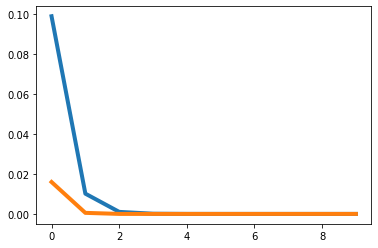

In [ ]:
plt.plot(T, err_j, T, err_gs, linewidth = 4)

# Older notes: 
## Jacobi Method
One of the easiest types of systems to solve is a diagonal system.  That is, if $P$ is a matrix with zeros everywhere except the main diagonal, then it is very fast to solve $P\mathbf{x} = \mathbf{c}$.  (You wrote your own diagonal system solver in the last activity, but the backslash command will be fast enough for our purposes.)  It is easy to check that we can solve such a system in $\mathcal{O}(N)$ steps, since finding each variable only involves a single division step.  It would therefore be convenient to choose a diagonal matrix for $P$ in our splitting method.  If we choose $P$ as the diagonal matrix with the same diagonal entries as $A$, then our method is called the *Jacobi method*.  That is, we should choose

$P = \left(\begin{array}{c} 6 & 0 & 0 \\ 0 & 8 & 0 \\ 0 & 0 & 9 \end{array}\right)$ and $T = \left(\begin{array}{c} 0 & 1 & 1 \\ 1 & 0 & 2 \\ 2 & 3 & 0 \end{array}\right)$.  

(Remember, we have to choose $T = A - P$ to satisfy the requirement for a matrix splitting method.)  We could type these matrices out in MATLAB, but there is a convenient function in python that will make this easier.  We encountered the `diag` function in the last lecture when we made a diagonal matrix with entries from a 1D array.  This function has another use when we use a 2D array as an argument: It creates a 1D array with all of the diagonal entries.  For example, 

In [ ]:
np.diag(A)

array([6, 8, 9])

In other words, if you give `diag` a matrix, it returns a 1D array with the diagonal entries.  If you give `diag` a 1D array, it returns a diagonal matrix with those entries.  Therefore, if we use `diag` twice on `A`, we will get a diagonal matrix with the same diagonal entries as `A`.  

In [ ]:
P = np.diag(np.diag(A))
print(P)

[[6 0 0]
 [0 8 0]
 [0 0 9]]


In [ ]:
T = A - P
print(T)

[[0 1 1]
 [1 0 2]
 [2 3 0]]


We can check that our method will converge by finding the magnitude of all the eigenvalues of $M = -P^{-1}T$.  

In [ ]:
M = -scipy.linalg.solve(P, T)
w, V = np.linalg.eig(M)
print(np.abs(w))

[0.42362039 0.13048966 0.29313073]


In [ ]:
print(np.max(np.abs(w)))

0.4236203869607174


Since the largest eigenvalue (and therefore all of the eigenvalues) is smaller than 1, the Jacobi method will converge for this problem.  

To begin a matrix splitting method, we need to make some initial guess for our solution.  We already showed that the choice of guess does not affect the convergence of our method, so it does not particularly matter what we choose here.  It is common to choose a random vector in situations like this, but we will choose a vector of all ones for no particular reason.  

In [ ]:
x0 = np.ones((3, 1))

We can now use the equation 

$\mathbf{x}_k = P^{-1}\left(-T\mathbf{x}_{k-1} + \mathbf{b}\right)$

to implement our algorithm.  Remember, you should use the `solve_triangular` function in place of matrix inverses in python for this problem.  (There is no builtin diagonal system solver in the scipy package, but we could also use the one we wrote.  For our purposes, `solve_triangular` will be fast enough.)  We could therefore find the next guess using 

In [ ]:
x1 = scipy.linalg.solve_triangular(P, -T @ x0 + b)
print(x1)

[[ 1.33333333]
 [-1.375     ]
 [-1.44444444]]


This is closer to the true solution than before, so it seems like we are on the right track.  We can continue this process with 

In [ ]:
x2 = scipy.linalg.solve_triangular(P, -T @ x1 + b)
print(x2)

[[ 2.13657407]
 [-0.80555556]
 [-0.72685185]]


In [ ]:
x3 = scipy.linalg.solve_triangular(P, -T @ x2 + b)
print(x3)

[[ 1.9220679 ]
 [-1.0853588 ]
 [-1.09516461]]


In [ ]:
x4 = scipy.linalg.solve_triangular(P, -T @ x3 + b)
print(x4)

[[ 2.03008723]
 [-0.96646734]
 [-0.95422882]]


These first few guesses do seem to confirm that we are converging to the correct solution, but it should also be clear that we don't want to continue this process by hand.  Since we are repeating almost the same code over and over again, it is probably a good idea to use a loop.  Since we don't know how many steps we need, this is actually a good place for a while loop, but we will start with a for loop because they tend to be easier to understand.  

### Jacobi method (version 1)
As a (very rough) first pass, we can try the following: 

In [ ]:
A = np.array([[6, 1, 1], [1, 8, 2], [2, 3, 9]])
b = np.array([[10], [-8], [-8]])
P = np.diag(np.diag(A))
T = A - P

x0 = np.ones((3, 1))
for k in range(100):
    x1 = scipy.linalg.solve_triangular(P, -T @ x0 + b)
    
print(x1)

[[ 1.33333333]
 [-1.375     ]
 [-1.44444444]]


This doesn't really do what we want, since it just calculates the first guess over and over again.  We need to somehow keep track of our guesses as we go.  

### Jacobi method (version 2)
There are several ways to do this, but we will try storing all of our guesses in a big matrix.  (We actually only ever need the last two guesses, but it might be convenient to have a record of all our guesses for analysis.)  In particular, we will make a matrix `X` where every column is supposed to represent one of our guesses.  Since our loop needs access to the initial guess, we will need to put this initial guess into our matrix as well.  

Remember that we always want to initialize our matrices by creating an "empty" matrix of the right size before we start our loop.  However, we don't know how many guesses we will actually need, so we don't know how big to make our matrix.  There is not really an ideal way around this problem, but we will start by making space for 101 columns, because or loop repeats 100 times (plus one column for the initial guess).  Note that it would be fine to make `X` bigger, but our code will fail if we initialize `X` with fewer than 101 columns, because at some point in our loop we would try to fill in a column past the end of our matrix.  

In [ ]:
A = np.array([[6, 1, 1], [1, 8, 2], [2, 3, 9]])
b = np.array([[10], [-8], [-8]])
P = np.diag(np.diag(A))
T = A - P

x0 = np.ones((3, 1))
X = np.zeros((3, 101))
X[:, 0:1] = x0

The last line uses a trick we mentioned briefly in the first week.  The problem is that python treats `X[:, 0]` as a 1D array, but x0 is a column vector (i.e., a 2D array with three rows and one column).  If you try to write `X[:, 0] = x0`, then python will throw an error because the shapes on the left and right do not match.  We could fix this by reshaping x0 to a 1D array with the code 

`X[:, 0] = x0.reshape(3)` or `X[:, 0] = np.reshape(x0, (3))`

but it is more convenient to replace `X[:, 0]` with `X[:, 0:1]`.  Remember, `0:1` means "start at index zero, then go up until just before you reach index one."  Of course, that just means index 0, but the fact that we used a colon (or in other words, a slice) tells python to pay attention to the shape and treat everything as 2D arrays.  

We are now in a position to fix our loop.  At every step, we want to update the next guess using our last guess.  Turning this into code, we have 

In [ ]:
for k in range(100):
    X[:, (k+1):(k+2)] = scipy.linalg.solve_triangular(P, -T @ X[:, k:(k+1)] + b)

We have used the same trick twice here.  We would really like to write 

`X[:, k+1] = scipy.linalg.solve_triangular(P, -T @ X[:, k] + b)`

but we run into the same issue where python has difficulty converting between 1D and 2D arrays.  The code `X[:, k]` makes a 1D array, but the `@` operator expects 2D arrays.  The solve_triangular function then produces a 2D array (a column vector), which we can't assign to `X[:, k+1]` because that is a 1D array.  As before, we could also fix this with a couple reshape commands, but this "slice trick" is a lot more convenient.  (It's actually faster too, since the reshape command copies the array in question.)

If you print out the matrix `X`, you should see that the columns are now filled with our guesses (and the first five columns match our old answers).  You should also notice that our method converged successfully, since the last column is the true solution to $A\mathbf{x} = \mathbf{b}$.  In fact, our method seemed to converge in much fewer than 100 steps, since the last twenty or so columns are all exactly the same.  

### Jacobi method (version 3)
The reason our method kept running after finding the correct answer is because we didn't include our stopping criterion.  Remember, we decided to stop if the difference between our last two guesses was smaller than some predefined tolerance.  We can fix our code by adding an `if` `break` combination, just like in the bisection method.  

In [ ]:
A = np.array([[6, 1, 1], [1, 8, 2], [2, 3, 9]])
b = np.array([[10], [-8], [-8]])
P = np.diag(np.diag(A))
T = A - P

tolerance = 1e-8
x0 = np.ones((3, 1))
X = np.zeros((3, 101))
X[:, 0:1] = x0

for k in range(100):
    X[:, (k+1):(k+2)] = scipy.linalg.solve_triangular(P, -T @ X[:, k:(k+1)] + b)
    if np.max(np.abs(X[:, k+1] - X[:, k])) < tolerance:
        break

This appears to have worked.  It converged to within about 8 decimal places of the correct answer after only 25 guesses (including the initial guess).  The rest of the matrix `X` is all zeros, because our loop stopped before filling in those columns.  We can chop off those extra zeros with the code

In [ ]:
X = X[:, :(k+2)]
print(X)

[[ 1.          1.33333333  2.13657407  1.9220679   2.03008723  1.98678269
   2.00551122  1.99764614  2.00099237  1.99957832  2.00017827  1.99992438
   2.000032    1.99998643  2.00000574  1.99999757  2.00000103  1.99999956
   2.00000019  1.99999992  2.00000003  1.99999999  2.00000001  2.
   2.        ]
 [ 1.         -1.375      -0.80555556 -1.0853588  -0.96646734 -1.0152037
  -0.99388193 -1.00269017 -0.99888975 -1.000479   -0.99979964 -1.00008563
  -0.99996395 -1.00001534 -0.99999352 -1.00000275 -0.99999884 -1.00000049
  -0.99999979 -1.00000009 -0.99999996 -1.00000002 -0.99999999 -1.
  -1.        ]
 [ 1.         -1.44444444 -0.72685185 -1.09516461 -0.95422882 -1.01786361
  -0.99199492 -1.00326407 -0.9985802  -1.00059061 -0.99974663 -1.0001064
  -0.99995465 -1.00001913 -0.99999187 -1.00000344 -0.99999854 -1.00000062
  -0.99999974 -1.00000011 -0.99999995 -1.00000002 -0.99999999 -1.
  -1.        ]]


(The term `:(k+2)` means "start at index 0 (the first column index) and go up to but not including index k+2."  We have to include index k+1 because that is the last column we filled in our loop.)

This is essentially a working version of the Jacobi method, but there is one more issue to watch out for.  It is entirely possible to come up with problems that take many more steps to converge.  However, our code will only run for 101 guesses before stopping (because the for loop only runs for 100 steps).  If that is not enough guesses, then our code will produce the wrong answer.  You can always tell if this happened, because after running the script `k` would be 99.  

A simple fix is just to make our for loop run for more steps (and initialize the matrix `X` with more columns), but it is pretty inconvenient to have to run our code over and over again to find the right number of steps.  

### Jacobi method (version 4)
A better solution is probably to use a while loop instead of a for loop.  This will avoid the issue of needing to guess a maximum number of steps, at the cost of complicating our code substantially.  As a first pass, we could try this: 

In [ ]:
A = np.array([[6, 1, 1], [1, 8, 2], [2, 3, 9]])
b = np.array([[10], [-8], [-8]])
P = np.diag(np.diag(A))
T = A - P

tolerance = 1e-8
err = tolerance + 1
x0 = np.ones((3, 1))
X = np.zeros((3, 101))
X[:, 0:1] = x0

k = 0
while err >= tolerance:
    X[:, (k+1):(k+2)] = scipy.linalg.solve_triangular(P, -T @ X[:, k:(k+1)] + b)
    err = np.max(np.abs(X[:, k+1] - X[:, k]))
    k = k + 1
X = X[:, :(k+1)]
print(X)

[[ 1.          1.33333333  2.13657407  1.9220679   2.03008723  1.98678269
   2.00551122  1.99764614  2.00099237  1.99957832  2.00017827  1.99992438
   2.000032    1.99998643  2.00000574  1.99999757  2.00000103  1.99999956
   2.00000019  1.99999992  2.00000003  1.99999999  2.00000001  2.
   2.          0.        ]
 [ 1.         -1.375      -0.80555556 -1.0853588  -0.96646734 -1.0152037
  -0.99388193 -1.00269017 -0.99888975 -1.000479   -0.99979964 -1.00008563
  -0.99996395 -1.00001534 -0.99999352 -1.00000275 -0.99999884 -1.00000049
  -0.99999979 -1.00000009 -0.99999996 -1.00000002 -0.99999999 -1.
  -1.          0.        ]
 [ 1.         -1.44444444 -0.72685185 -1.09516461 -0.95422882 -1.01786361
  -0.99199492 -1.00326407 -0.9985802  -1.00059061 -0.99974663 -1.0001064
  -0.99995465 -1.00001913 -0.99999187 -1.00000344 -0.99999854 -1.00000062
  -0.99999974 -1.00000011 -0.99999995 -1.00000002 -0.99999999 -1.
  -1.          0.        ]]


There is actually a serious problem with this code, but before we discuss it we should see why we made the changes we did.  In particular, there are a few important differences between this and the for loop version.  First, we have to keep track of `k` ourselves, which means we ahve to get a starting value and to increment it in the loop.  Second, the stopping condition is now at the top of the while loop, but it is backwards.  This is because the `if` `break`combo tests when to stop, but the while loop condition tests when to keep going.  We should keep guessing as long as our error is larger than the tolerance.  Third, we initialized the error to a strange value: `tolerance + 1`.  The reason for this is that the while loop needs to know the error in order to test its condition.  We don't actually have an error before we make our second guess, so we have to make up an error value that will ensure we continue.  Since `tolerance + 1` is greater than `tolerance`, we know that the while loop will execute at least one step.  

The problem with this code is that it still won't actually work if the loop takes more than 100 iterations.  To see what goes wrong, let's initialize our matrix `X` as a $3\times 11$ matrix instead of $3\times 101$.  

In [ ]:
A = np.array([[6, 1, 1], [1, 8, 2], [2, 3, 9]])
b = np.array([[10], [-8], [-8]])
P = np.diag(np.diag(A))
T = A - P

tolerance = 1e-8
err = tolerance + 1
x0 = np.ones((3, 1))
X = np.zeros((3, 11))
X[:, 0:1] = x0

k = 0
while err >= tolerance:
    X[:, (k+1):(k+2)] = scipy.linalg.solve_triangular(P, -T @ X[:, k:(k+1)] + b)
    err = np.max(np.abs(X[:, k+1] - X[:, k]))
    k = k + 1
X = X[:, :(k+1)]
print(X)

IndexError: index 11 is out of bounds for axis 1 with size 11

Python throws an error once k reaches 10, because we try to fill in column index 11 (the 12th column of X) when it doesn't actually exist.  To fix this, we need to expand the size of our array as we go.  There are several ways to do this, but all of them are lacking in either elegance or efficiency.  We will use the `numpy` function `hstack`.  This is essentially the same thing a `append`, but for 2D arrays.  (The `append` function only really works on 1D arrays, while `hstack` appends columns to the end of a 2D array.)

In [ ]:
A = np.array([[6, 1, 1], [1, 8, 2], [2, 3, 9]])
b = np.array([[10], [-8], [-8]])
P = np.diag(np.diag(A))
T = A - P

tolerance = 1e-8
err = tolerance + 1
x0 = np.ones((3, 1))
X = np.zeros((3, 1))
X[:, 0:1] = x0

k = 0
while err >= tolerance:
    X = np.hstack((X, scipy.linalg.solve_triangular(P, -T @ X[:, k:(k+1)] + b)))
    err = np.max(np.abs(X[:, k+1] - X[:, k]))
    k = k + 1
print(X)

[[ 1.          1.33333333  2.13657407  1.9220679   2.03008723  1.98678269
   2.00551122  1.99764614  2.00099237  1.99957832  2.00017827  1.99992438
   2.000032    1.99998643  2.00000574  1.99999757  2.00000103  1.99999956
   2.00000019  1.99999992  2.00000003  1.99999999  2.00000001  2.
   2.        ]
 [ 1.         -1.375      -0.80555556 -1.0853588  -0.96646734 -1.0152037
  -0.99388193 -1.00269017 -0.99888975 -1.000479   -0.99979964 -1.00008563
  -0.99996395 -1.00001534 -0.99999352 -1.00000275 -0.99999884 -1.00000049
  -0.99999979 -1.00000009 -0.99999996 -1.00000002 -0.99999999 -1.
  -1.        ]
 [ 1.         -1.44444444 -0.72685185 -1.09516461 -0.95422882 -1.01786361
  -0.99199492 -1.00326407 -0.9985802  -1.00059061 -0.99974663 -1.0001064
  -0.99995465 -1.00001913 -0.99999187 -1.00000344 -0.99999854 -1.00000062
  -0.99999974 -1.00000011 -0.99999995 -1.00000002 -0.99999999 -1.
  -1.        ]]


**Warning:** This code is substantially slower than the corresponding for loop version, because the `hstack` function copies our matrix `X` at every step.  This loss of speed is unavoidable if we want to store all of our guesses without first initializing a big enough array.  

The one thing you should always be wary of with while loops is the risk of infinite loops.  This is particularly important with matrix splitting methods, because we know that they might not converge even if the system $A\mathbf{x} = \mathbf{b}$ has a solution.  For example, if we made a mistake when entering $A$ and accidentally wrote `A = np.array([[1, 6, 1], [1, 8, 2], [2, 3, 9]])` then you would find that your code ran forever.  Even though the only difference between this and the previous version is that we swapped two entries of $A$.  (Actually, this particular example does eventually stop by throwing an error, but it takes many thousands of steps.)

### Jacobi method (version 5)
We know one way to fix this: We could first test the eigenvalues of $M$ to see if they are less than one.  

In [ ]:
A = np.array([[6, 1, 1], [1, 8, 2], [2, 3, 9]])
b = np.array([[10], [-8], [-8]])
P = np.diag(np.diag(A))
T = A - P

tolerance = 1e-8
err = tolerance + 1
x0 = np.ones((3, 1))
X = np.zeros((3, 1))
X[:, 0:1] = x0

k = 0
M = -scipy.linalg.solve(P, T)
w, V = np.linalg.eig(M)
if np.max(np.abs(w)) < 1:
    while err >= tolerance:
        X = np.hstack((X, scipy.linalg.solve_triangular(P, -T @ X[:, k:(k+1)] + b)))
        err = np.max(np.abs(X[:, k+1] - X[:, k]))
        k = k + 1
print(X)

[[ 1.          1.33333333  2.13657407  1.9220679   2.03008723  1.98678269
   2.00551122  1.99764614  2.00099237  1.99957832  2.00017827  1.99992438
   2.000032    1.99998643  2.00000574  1.99999757  2.00000103  1.99999956
   2.00000019  1.99999992  2.00000003  1.99999999  2.00000001  2.
   2.        ]
 [ 1.         -1.375      -0.80555556 -1.0853588  -0.96646734 -1.0152037
  -0.99388193 -1.00269017 -0.99888975 -1.000479   -0.99979964 -1.00008563
  -0.99996395 -1.00001534 -0.99999352 -1.00000275 -0.99999884 -1.00000049
  -0.99999979 -1.00000009 -0.99999996 -1.00000002 -0.99999999 -1.
  -1.        ]
 [ 1.         -1.44444444 -0.72685185 -1.09516461 -0.95422882 -1.01786361
  -0.99199492 -1.00326407 -0.9985802  -1.00059061 -0.99974663 -1.0001064
  -0.99995465 -1.00001913 -0.99999187 -1.00000344 -0.99999854 -1.00000062
  -0.99999974 -1.00000011 -0.99999995 -1.00000002 -0.99999999 -1.
  -1.        ]]


## Strict Diagonal Dominance
This last method is fairly tempting, but it raises an important question that we have so far avoided.  How long does it take to find the eigenvalues of a matrix?  The point is this: We want to solve $A\mathbf{x} = \mathbf{b}$ with a method that is faster than $\mathcal{O}(N^3)$.  We don't know exactly how many steps the Jacobi method will require, but each step only takes $\mathcal{O}(N)$ flops (well, technically it takes $\mathcal{O}(N^2)$ flops still, because multiplying $T\mathbf{x}_{k-1}$ is $\mathcal{O}(N^2)$, but the point still applies), so there is hope that it will ultimately be faster than Gaussian elimination.  However, if we have to start our method with a call to `eig` then we should worry that `eig` might take so long that we might as well just use Gaussian elimination in the first place.  

It turns out that our fears are well founded.  Most methods to find eigenvalues are iterative, so big-oh notation doesn't necessarily apply, but it is not uncommon for the `eig` function to take at least as long as Gaussian elimination.  This means that if we are forced to check the eigenvalues of $-P^{-1}T$ before we use a splitting method, we won't actually save any time over just using the `solve` function.  

Fortunately, there are some other properties of our system that can tell us about the convergence of matrix splitting methods.  The most important such property is called *strict diagonal dominance*.  We say that a matrix is strictly diagonally dominant if the absolute value of each diagonal entry is greater than the sum of the absolute values of the other entries in that row.  That is, $A$ is strictly diagonally dominant if 

$|a_{ii}| > \sum_{j \neq i}|a_{ij}|$, 

for all $i\leq N$.  (The summation notation means to add up every entry in the row except $|a_{ii}|$.)  This property is much easier to check than the eigenvalues of a matrix.  We will make use of the following theorem without proving it: 

The Jacobi method for solving $A\mathbf{x} = \mathbf{b}$ will converge if $A$ is strictly diagonally dominant.  

There are a few things worth noting about this theorem.  First, this is a property of $A$, not of $M$.  You need to check if the original left hand side of your system is strictly diagonally dominant.  Second, this theorem says nothing about what happens when $A$ is not strictly diagonally dominant.  It is entirely possible to come up with such a system where the Jacobi method still converges.  If $A$ is not strictly diagonally dominant, then you still have to find the eigenvalues of $M$ to decide if the Jacobi method will converge.  Third, this theorem does not apply to all matrix splitting methods.  If you choose a different $P$ and $T$, there is no guarantee that the corresponding splitting method will converge.  

This also explains why our original example converged.  In the first row, we had $|6| > |1| + |1|$.  In the second row, we had $|8| > |1| + |2|$.  In the third row, we had $|9| > |2| + |3|$.  

# Gauss-Seidel Method
Another type of system that is relatively easy to solve is a triangular system.  If we chose $P$ to be triangular, then we could solve systems of the form $P\mathbf{x} = \mathbf{c}$ in $\mathcal{O}(N^2)$ flops, which is still much faster than Gaussian elimination.  We could therefore choose $P$ to be a triangular portion of the matrix $A$.  In particular, if we choose $P$ to be the main diagonal of $A$ and all the entries below it, then $P$ will be lower triangular.  We call the matrix splitting method with this choice of $P$ the *Gauss-Seidel method*.  For example, in our example system we would choose 

$P = \left(\begin{array}{c} 6 & 0 & 0 \\ 1 & 8 & 0 \\ 2 & 3 & 9 \end{array}\right)$ and $T = \left(\begin{array}{c} 0 & 1 & 1 \\ 0 & 0 & 2 \\ 0 & 0 & 0 \end{array}\right)$.  

There is a useful function in the numpy package for extracting the lower triangular portion of a matrix called `tril`.  We can make this splitting with the code

In [ ]:
P = np.tril(A)
print(P)

[[6 0 0]
 [1 8 0]
 [2 3 9]]


In [ ]:
T = A - P
print(T)

[[0 1 1]
 [0 0 2]
 [0 0 0]]


Besides the different choices of $P$ and $T$, the Gauss-Seidel method works exactly the same as the Jacobi method.  We can test that the Gauss-Seidel method will converge by checking the eigenvalues of $M = -P^{-1}T$.  

In [ ]:
M = -scipy.linalg.solve(P, T)
w, V = np.linalg.eig(M)
print(np.max(np.abs(w)))

0.09622504486493762


Since all of the eigenvalues are less than 1, this method will converge.  

It turns out that the strict diagonal dominance test also works for the Gauss-Seidel method.  If $A$ (not $M$) is strictly diagonally dominant, then the Gauss-Seidel method will converge.  Again, this rule doesn't tell you what happens if $A$ is not strictly diagonally dominant.  It is entirely possible for one or both of the Jacobi and Gauss-Seidel methods to converge if $A$ is not strictly diagonally dominant.  

To code the Gauss-Seidel method, we could use version 3 (or one of the working while loop versions) of the code from above with our new $P$ and $T$:

In [ ]:
A = np.array([[6, 1, 1], [1, 8, 2], [2, 3, 9]])
b = np.array([[10], [-8], [-8]])
P = np.tril(A)
T = A - P

tolerance = 1e-8
x0 = np.ones((3, 1))
X = np.zeros((3, 101))
X[:, 0:1] = x0

for k in range(100):
    X[:, (k+1):(k+2)] = scipy.linalg.solve_triangular(P, -T @ X[:, k:(k+1)] + b, lower=True)
    if np.max(np.abs(X[:, k+1] - X[:, k])) < tolerance:
        break
X = X[:, :(k+2)]
print(X)

[[ 1.          1.33333333  2.02160494  2.0090735   2.00101816  2.00005268
   1.99999765  1.9999992   1.99999991  2.          2.        ]
 [ 1.         -1.41666667 -1.07445988 -1.0061389  -1.00013476 -0.99996125
  -0.99999355 -0.99999949 -0.99999999 -1.         -1.        ]
 [ 1.         -0.71296296 -0.97998114 -0.99997003 -1.00018134 -1.00002462
  -1.00000163 -0.99999999 -0.99999998 -1.         -1.        ]]


Notice that this method converged in fewer steps than the Jacobi method.  We already knew this would happen because the largest eigenvalue of $M$ for the Jacobi method was approximately $0.4236$, while the largest eigenvalue of $M$ for the Gauss-Seidel method was approximately $0.0962$.  The smaller the eigenvalue, the faster the splitting method, so we would expect Gauss-Seidel to converge faster for this problem.  This is actually fairly common.  As a rule of thumb, if both the Gauss-Seidel and the Jacobi method converge for a given problem, then Gauss-Seidel will typically be about twice as fast.  However, it is possible to find methods where one converges and the other does not or where both converge but the Jacobi method is faster.  In general, if you want to find the fastest method there is no substitute for checking the maximum eigenvalue of $M$.  